In [1]:
# import the packages
from tsv_data_analytics import tsvutils
from tsv_data_analytics_ext import graphext

# some nice display options
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important;}</style>"))
display(HTML("<style>div.output_scroll { height: 60em; }</style>"))

In [2]:
# read data. this is the famouse iris dataset
# the read() method should be used in general that takes a tsv of gzip compressed tsv
# x = tsvutils.read("/path/to/tsv-file.tsv.gz")
# or
# x = tsvutils.read("s3://bucket/path/to/tsv-file.tsv.gz")
x = tsvutils.read_url("https://github.com/CrowdStrike/tsv-data-analytics/raw/main/data/iris.tsv")

In [3]:
# show raw data
x.sample_rows(10).export_to_df(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,2.5,3.0,1.1,Iris-versicolor
1,7.3,2.9,6.3,1.8,Iris-virginica
2,5.4,3.7,1.5,0.2,Iris-setosa
3,5.6,3.0,4.5,1.5,Iris-versicolor
4,7.4,2.8,6.1,1.9,Iris-virginica


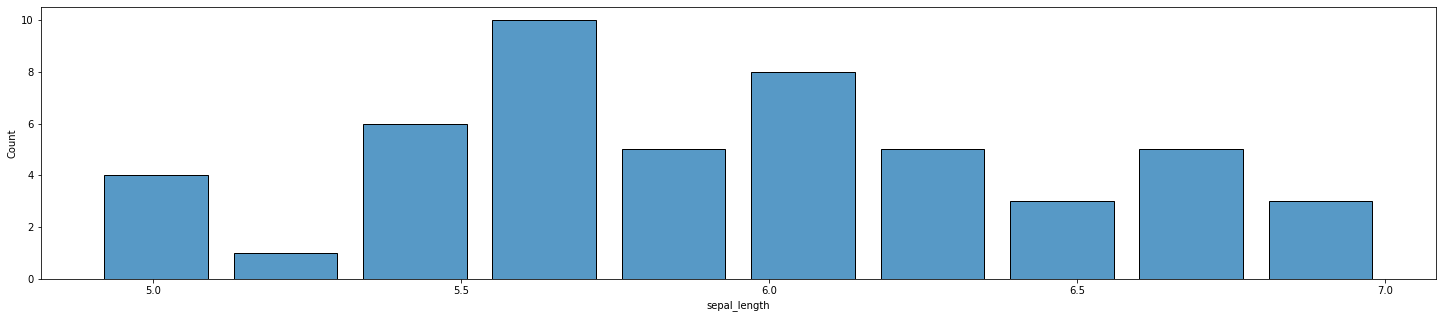

In [4]:
# simple histogram on columns
x \
    .eq_str("class", "Iris-versicolor") \
    .extend_class(graphext.VisualTSV).histogram("sepal_length")

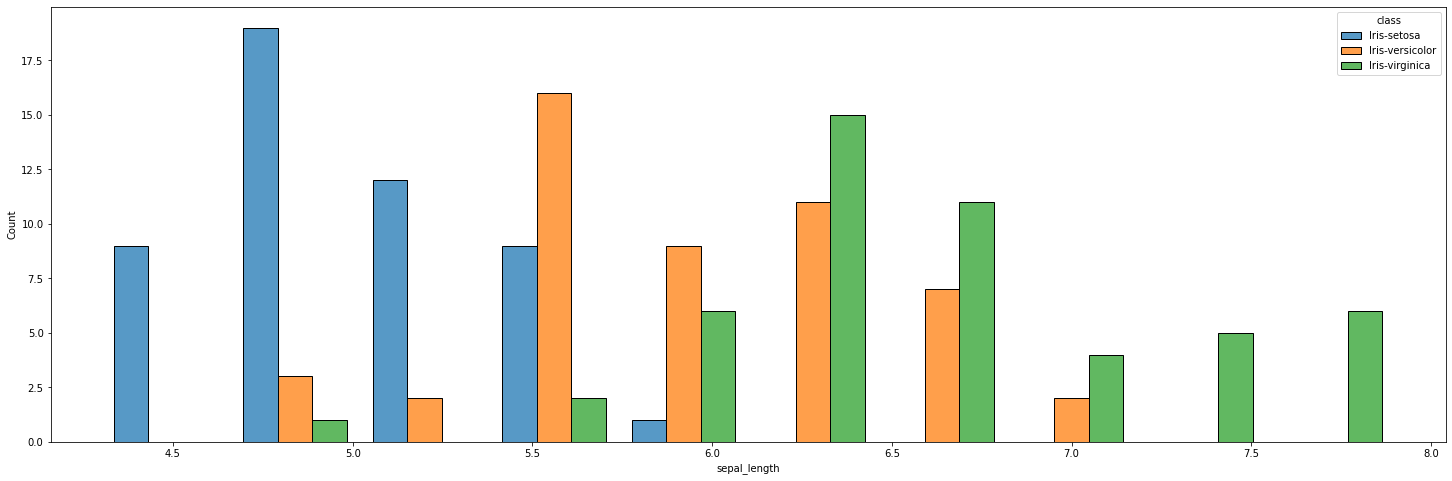

In [5]:
# multiple classes data based histogram
x \
    .extend_class(graphext.VisualTSV).histogram("sepal_length", "class", yfigsize = 8)

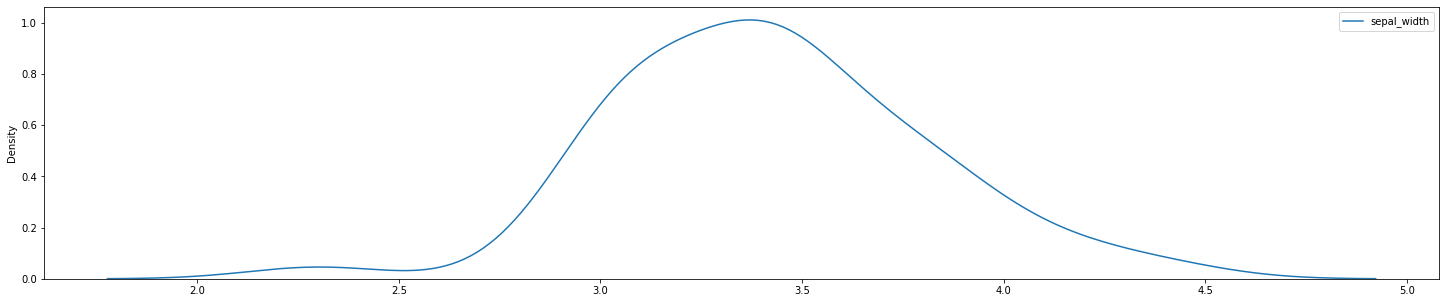

In [6]:
# density plot
x \
    .eq_str("class", "Iris-setosa") \
    .extend_class(graphext.VisualTSV).density("sepal_width")

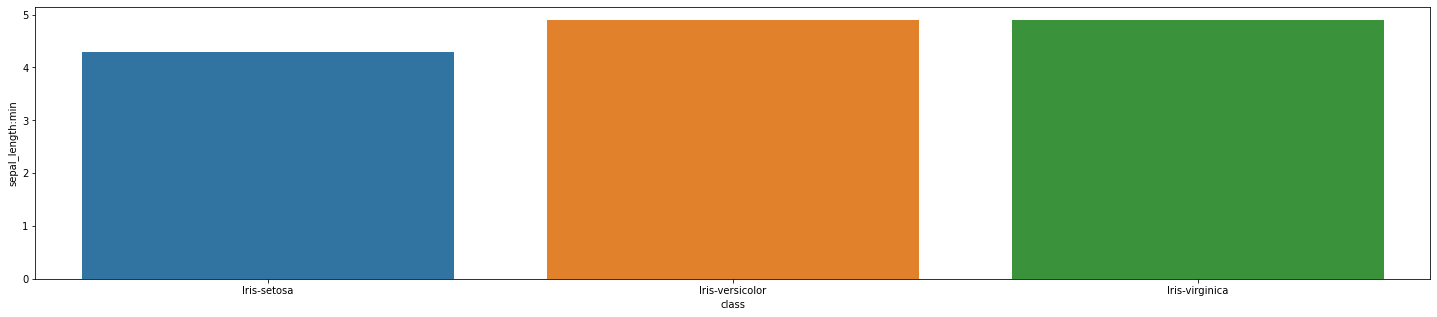

In [7]:
# compute simple statistics and use it for visualization. Note the naming convension of appending aggregate function
# name as suffix for the resultant column
x \
    .aggregate("class", ["sepal_length"], [min]) \
    .extend_class(graphext.VisualTSV).barchart("class", "sepal_length:min")

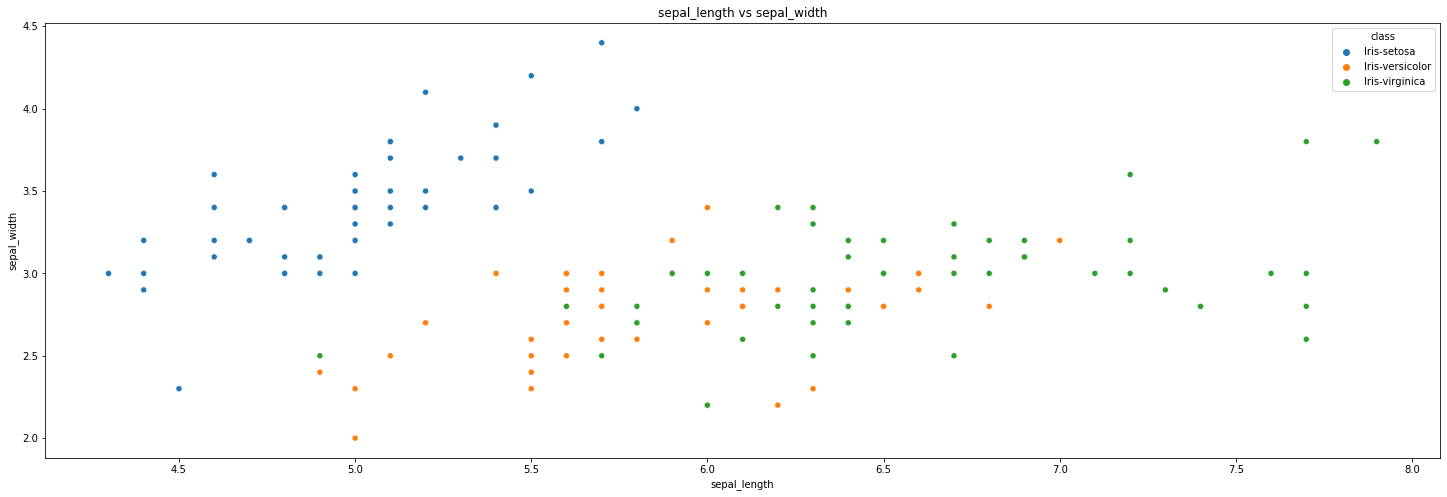

In [8]:
# scatter plot to see relationships between different attributes
x.extend_class(graphext.VisualTSV).scatterplot("sepal_length", "sepal_width", "class", yfigsize = 8)

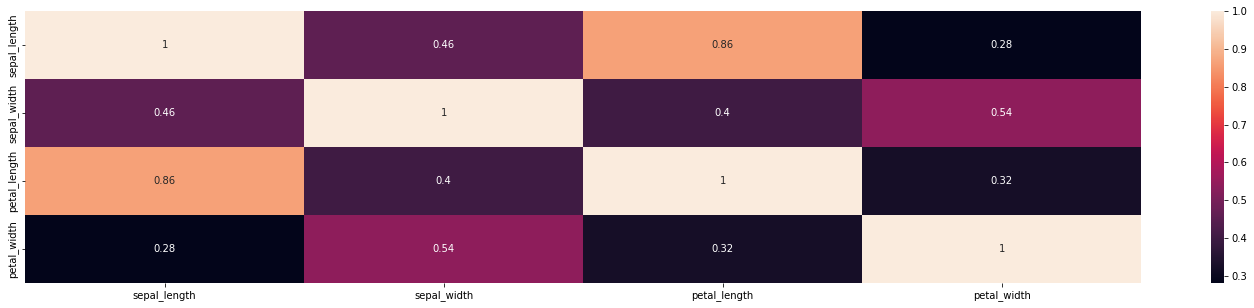

In [9]:
# correlation heatmap for finding correlation between lot of attributes
x \
    .eq_str("class", "Iris-virginica") \
    .extend_class(graphext.VisualTSV).corr_heatmap(["sepal_length", "sepal_width", "petal_length", "petal_width"])

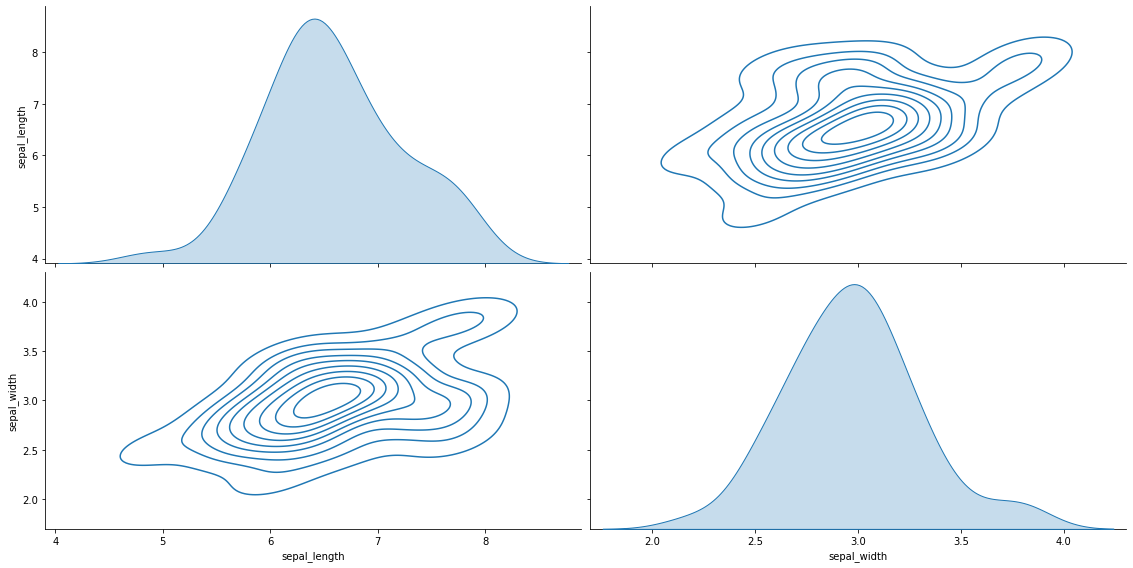

In [10]:
x \
    .eq_str("class", "Iris-virginica") \
    .extend_class(graphext.VisualTSV).pairplot(["sepal_length", "sepal_width"], kind = "kde", diag_kind = "auto", xfigsize = 8, yfigsize = 4)